In [251]:

import numpy as np
import tensorflow_addons as tfa
import tensorflow as tf
import pandas as pd
from tensorflow import feature_column
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings(action='ignore')
from silence_tensorflow import silence_tensorflow
silence_tensorflow()
from sklearn.preprocessing import StandardScaler


In [252]:
df = pd.read_csv('이상치제거.csv')
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.head()

,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),청력(좌),...,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,실명(좌),실명(우)
0,1,1,30,43,170,75,90.0,1.0,1.0,1.0,...,1.0,1.0,21.0,35.0,40.0,1.0,0,0,0,0
1,2,1,30,11,180,80,89.0,0.9,1.2,1.0,...,1.0,0.9,20.0,36.0,27.0,3.0,1,0,0,0
2,4,1,50,48,175,80,91.0,1.5,1.2,1.0,...,1.0,1.1,29.0,34.0,18.0,1.0,1,0,0,0
3,5,1,50,30,165,60,80.0,1.0,1.2,1.0,...,1.0,0.8,19.0,12.0,25.0,1.0,1,0,0,0
4,6,1,50,41,165,55,75.0,1.2,1.5,1.0,...,3.0,0.8,29.0,40.0,37.0,3.0,0,0,0,0


# 남녀 따로 정규화

In [253]:
df_male = df.loc[df['성별코드']==1]
df_female = df.loc[df['성별코드']==2]

In [254]:

Scalar_Index =['신장(5Cm단위)', '체중(5Kg단위)',
       '허리둘레', '시력(좌)', '시력(우)', '수축기혈압', '이완기혈압',
       '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소',
       '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피']

scaler = StandardScaler()
scaler.fit(df_male[Scalar_Index])
df_male[Scalar_Index] = scaler.transform(df_male[Scalar_Index])



Scalar_Index =['신장(5Cm단위)', '체중(5Kg단위)',
       '허리둘레', '시력(좌)', '시력(우)', '수축기혈압', '이완기혈압',
       '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소',
       '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피']


scaler = StandardScaler()
scaler.fit(df_female[Scalar_Index])
df_female[Scalar_Index] = scaler.transform(df_female[Scalar_Index])

In [255]:
data = pd.concat([df_male,df_female],axis=0)
data

,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),청력(좌),...,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,실명(좌),실명(우)
0,1,1,30,43,0.210680,0.586903,0.789218,-0.028882,-0.066962,1.0,...,1.0,0.243360,-0.454320,1.108833,0.546706,1.0,0,0,0,0
1,2,1,30,11,1.735541,1.067141,0.660236,-0.319894,0.264651,1.0,...,1.0,-0.361805,-0.614998,1.208786,-0.275614,3.0,1,0,0,0
2,4,1,50,48,0.973110,1.067141,0.918200,1.426179,0.264651,1.0,...,1.0,0.848526,0.831102,1.008881,-0.844912,1.0,1,0,0,0
3,5,1,50,30,-0.551751,-0.853812,-0.500603,-0.028882,0.264651,1.0,...,1.0,-0.966970,-0.775676,-1.190066,-0.402124,1.0,1,0,0,0
4,6,1,50,41,-0.551751,-1.334051,-1.145513,0.553142,0.762071,1.0,...,3.0,-0.966970,0.831102,1.608594,0.356940,3.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794465,999989,2,40,29,1.551982,-0.021912,-0.902523,0.303639,0.495264,1.0,...,1.0,-0.865843,-0.454012,-0.835713,-1.039201,1.0,1,1,0,0
794466,999990,2,60,41,-0.841766,1.141014,0.769783,-0.586664,-0.210551,1.0,...,1.0,-0.865843,1.180515,0.646153,0.055363,2.0,0,0,0,0
794468,999992,2,30,41,1.551982,1.722476,0.543795,0.303639,0.142356,1.0,...,1.0,-0.177906,-0.290559,-0.094780,-0.674347,1.0,1,1,0,0
794471,999995,2,50,27,-0.841766,-0.603375,-0.405351,0.303639,0.142356,1.0,...,1.0,0.510031,1.017063,1.016620,0.876286,1.0,1,0,0,0


## 컬럼명 영어 변환

In [256]:
data.columns =['ID', 'sex', 'age', '시도코드', 'height', 'weight',
       'weist', 'sightR', 'sightL', 'earL', 'earR', 'bloodP1', 'bloodP2',
       'bloodsugar', 'chol', 'tri', 'HDL', 'LDL', 'hemoglobin',
       'urineprotein', 'creatinine', 'AST', 'ALT', 'GT', 'smoke', 'drink',
       'mouth','blindleft','blindright']

##  Label column생성

In [257]:
data['age2'] = 0
data['age3'] = 0
data['age4'] = 0
data['age5'] = 0
data['age6'] = 0
data['age7'] = 0
data['age8'] = 0

data.loc[data['age'] == 20, 'age2'] = 1
data.loc[data['age'] == 30, 'age3'] = 1
data.loc[data['age'] == 40, 'age4'] = 1
data.loc[data['age'] == 50, 'age5'] = 1
data.loc[data['age'] == 60, 'age6'] = 1
data.loc[data['age'] == 70, 'age7'] = 1
data.loc[data['age'] == 80, 'age8'] = 1


In [258]:
data

,ID,sex,age,시도코드,height,weight,weist,sightR,sightL,earL,...,mouth,blindleft,blindright,age2,age3,age4,age5,age6,age7,age8
0,1,1,30,43,0.210680,0.586903,0.789218,-0.028882,-0.066962,1.0,...,0,0,0,0,1,0,0,0,0,0
1,2,1,30,11,1.735541,1.067141,0.660236,-0.319894,0.264651,1.0,...,0,0,0,0,1,0,0,0,0,0
2,4,1,50,48,0.973110,1.067141,0.918200,1.426179,0.264651,1.0,...,0,0,0,0,0,0,1,0,0,0
3,5,1,50,30,-0.551751,-0.853812,-0.500603,-0.028882,0.264651,1.0,...,0,0,0,0,0,0,1,0,0,0
4,6,1,50,41,-0.551751,-1.334051,-1.145513,0.553142,0.762071,1.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794465,999989,2,40,29,1.551982,-0.021912,-0.902523,0.303639,0.495264,1.0,...,1,0,0,0,0,1,0,0,0,0
794466,999990,2,60,41,-0.841766,1.141014,0.769783,-0.586664,-0.210551,1.0,...,0,0,0,0,0,0,0,1,0,0
794468,999992,2,30,41,1.551982,1.722476,0.543795,0.303639,0.142356,1.0,...,1,0,0,0,1,0,0,0,0,0
794471,999995,2,50,27,-0.841766,-0.603375,-0.405351,0.303639,0.142356,1.0,...,0,0,0,0,0,0,1,0,0,0


## Feature_column 생성

In [259]:

NUMERIC_COLUMN = ['height', 'weight', 'weist', 'sightR',
       'sightL', 'bloodP1', 'bloodP2', 'bloodsugar','LDL','tri','hemoglobin','chol','HDL','AST','ALT','GT'
                  ,'creatinine']

LABEL_COLUMN = ['age2', 'age3', 'age4', 'age5', 'age6', 'age7','age8']


train_data = data[data['ID']%5 != 0]
test_data = data[data['ID']%5 == 0]

## Define feature_layer
feature_columns = []
for header in NUMERIC_COLUMN:
	feature_columns.append(feature_column.numeric_column(header, dtype=tf.dtypes.float64))


feature_layer = tf.keras.layers.DenseFeatures(feature_columns)


## Data Split & shuffle
train_df, val_df = train_test_split(train_data, test_size=0.2, random_state=42)

x_train = dict(train_df[NUMERIC_COLUMN ])
x_test = dict(test_data[NUMERIC_COLUMN ])
x_val = dict(val_df[NUMERIC_COLUMN ])

y_train = train_df[LABEL_COLUMN]
y_test = test_data[LABEL_COLUMN]
y_val = val_df[LABEL_COLUMN]

In [260]:
cb = tf.keras.callbacks.EarlyStopping(
    monitor='loss',
    min_delta = 0.001,
    patience=50,
    verbose=10,
    mode='min',
    baseline=None,
    restore_best_weights=True
    )
METRICS = tfa.metrics.F1Score(
      num_classes = 7,
      average = 'macro',
      name ='f1_score',
      threshold = None
      )

# 파라미터 튜닝

In [261]:
# import optuna
# def objective(hp):
# 
#     hp_dropout = hp.suggest_categorical('dropout', [0.1, 0.2, 0.3] )
#     hp_learning_rate = hp.suggest_categorical('learning_rate', [1e-2, 1e-3, 1e-4] )
#     hp_units =  hp.suggest_categorical('units', [32, 64, 128])
# 
# 
#     model = tf.keras.models.Sequential([
#             feature_layer,
#             tf.keras.layers.Dense(units=hp_units, activation='relu'),
#             tf.keras.layers.Dropout(rate=hp_dropout),
#             tf.keras.layers.Dense(units=hp_units, activation='relu'),
#             tf.keras.layers.Dropout(rate=hp_dropout),
#             tf.keras.layers.Dense(units=hp_units, activation='relu'),
#             tf.keras.layers.Dropout(rate=hp_dropout),
#             tf.keras.layers.Dense(units=7, activation='sigmoid')
#         ])
# 
#     model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
#                       oss=tfa.losses.SigmoidFocalCrossEntropy(alpha=[0.9,0.85,0.75,0.75,0.85,0.9,0.98]),
#                       #loss=tf.keras.losses.SparseCategoricalCrossentropy(),
#                       metrics=METRICS
#         )
# 
#     model.fit(
#             x_train, y_train,
#             batch_size=Batch_Size,
#             epochs=30,
#             verbose=1,
#             validation_data=(x_val, y_val),
#             callbacks=cb,
#         )
#     y_val_pred = model.predict(x_val)
#     METRICS.update_state(y_val, y_val_pred)
#     res = METRICS.result()
#     score = float(res.numpy())
# 
# 
#     return score
# 
# DNN_study = optuna.create_study(direction='maximize')
# DNN_study.optimize(objective, n_trials = 20)
# print('study.best_params:', DNN_study.best_trial.value)
# print('Number of finished trials:', len(DNN_study.trials))
# print('Best trial:', DNN_study.best_trial.params)
# print('study.best_params:', DNN_study.best_params)


# 모델생성

In [262]:

## Hyper-Parameter
Batch_Size = 256
Dim = 128
Dropout = 0.2
Epochs= 100

## Build model
model = tf.keras.models.Sequential([
        feature_layer,
        tf.keras.layers.Dense(units=Dim, activation='relu'),
        tf.keras.layers.Dropout(rate=Dropout),
        tf.keras.layers.Dense(units=Dim, activation='relu'),
        tf.keras.layers.Dropout(rate=Dropout),
        tf.keras.layers.Dense(units=Dim, activation='relu'),
        tf.keras.layers.Dropout(rate=Dropout),
        tf.keras.layers.Dense(units=7, activation='sigmoid')
    ])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss=tfa.losses.SigmoidFocalCrossEntropy(gamma= 2, alpha=[ 0.92, 0.88, 0.78, 0.74, 0.84, 0.94, 0.99]),
                  metrics=METRICS)

model.fit(
        x_train, y_train,
        batch_size=Batch_Size,
        epochs=Epochs,
        verbose=1,
        validation_data=(x_val, y_val),
        callbacks=cb,
    )




Epoch 1/100
1986/1986 [==============================] - 20s 10ms/step - loss: 0.2221 - f1_score: 0.3165 - val_loss: 0.2173 - val_f1_score: 0.3592
Epoch 2/100
1986/1986 [==============================] - 19s 10ms/step - loss: 0.2178 - f1_score: 0.3380 - val_loss: 0.2163 - val_f1_score: 0.3547
Epoch 3/100
1986/1986 [==============================] - 19s 10ms/step - loss: 0.2170 - f1_score: 0.3421 - val_loss: 0.2165 - val_f1_score: 0.3679
Epoch 4/100
1986/1986 [==============================] - 19s 10ms/step - loss: 0.2166 - f1_score: 0.3439 - val_loss: 0.2163 - val_f1_score: 0.3622
Epoch 5/100
1986/1986 [==============================] - 19s 10ms/step - loss: 0.2163 - f1_score: 0.3447 - val_loss: 0.2153 - val_f1_score: 0.3713
Epoch 6/100
1986/1986 [==============================] - 19s 10ms/step - loss: 0.2160 - f1_score: 0.3470 - val_loss: 0.2152 - val_f1_score: 0.3545
Epoch 7/100
1986/1986 [==============================] - 19s 10ms/step - loss: 0.2159 - f1_score: 0.3480 - val_loss: 0

In [277]:
#model.save("나이예측_sigmoid")


In [264]:
y_pred = (model.predict(x_test))
y_pred = pd.DataFrame(y_pred)
y_pred.columns =[2,3,4,5,6,7,8]
y_pred['예측값'] = y_pred.idxmax(axis=1)

In [265]:
y_test.columns =[2,3,4,5,6,7,8]
y_test['실제값'] = y_test.idxmax(axis=1)
y_test= y_test['실제값']
y_predict = y_pred['예측값']

In [266]:
data_id =data['ID']
y_test = pd.concat([y_test,data_id],axis=1)


In [267]:
y_test = y_test.reset_index()
y_test = y_test.drop(['index'],axis =1 )
result = pd.concat([y_test,y_predict],axis = 1)
result =result[['ID','실제값','예측값']]
result.dropna(inplace = True)
result

,ID,실제값,예측값
0,5,5.0,5.0
1,20,6.0,6.0
2,35,3.0,4.0
3,55,4.0,2.0
4,75,5.0,5.0
...,...,...,...
159018,999970,5.0,4.0
159019,999980,5.0,3.0
159020,999985,5.0,5.0
159021,999990,6.0,5.0


In [268]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
print('정확도 :', round(accuracy_score(result['실제값'],result['예측값']),4))
print('mse :', round(mean_squared_error(result['실제값'],result['예측값']),4))

정확도 : 0.3764
mse : 1.5398


Text(0.5, 1.0, '20')

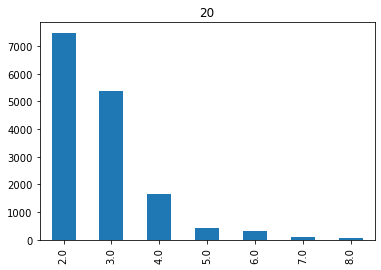

In [269]:
import matplotlib.pyplot as plt
result_20 = result.loc[result['실제값']==2]
result_20['예측값'].value_counts().plot(kind = 'bar')
plt.title(20)

Text(0.5, 1.0, '30')

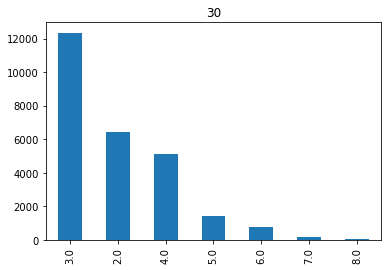

In [270]:
result_30 = result.loc[result['실제값'] == 3]
result_30['예측값'].value_counts().plot(kind='bar')
plt.title(30)

Text(0.5, 1.0, '40')

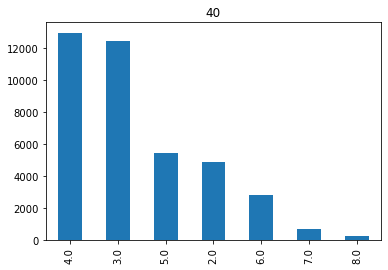

In [271]:
result_40 = result.loc[result['실제값'] == 4]
result_40['예측값'].value_counts().plot(kind='bar')
plt.title(40)

Text(0.5, 1.0, '50')

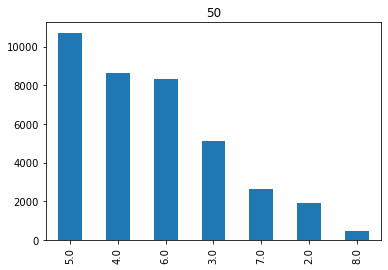

In [272]:
result_50 = result.loc[result['실제값'] == 5]
result_50['예측값'].value_counts().plot(kind='bar')
plt.title(50)

Text(0.5, 1.0, '60')

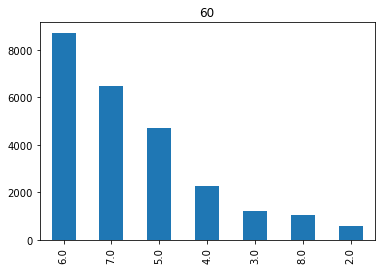

In [273]:
result_60 = result.loc[result['실제값'] == 6]
result_60['예측값'].value_counts().plot(kind='bar')
plt.title(60)

Text(0.5, 1.0, '70')

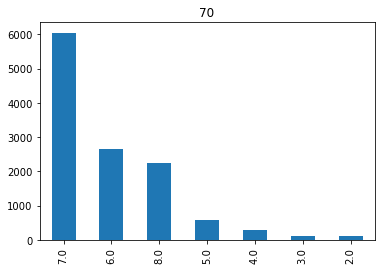

In [274]:
result_70 = result.loc[result['실제값'] == 7]
result_70['예측값'].value_counts().plot(kind='bar')
plt.title(70)

Text(0.5, 1.0, '80')

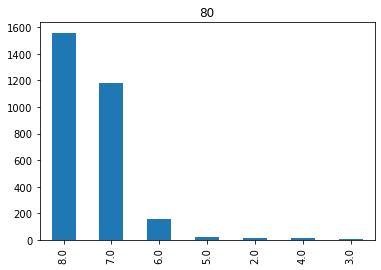

In [275]:
result_80 = result.loc[result['실제값'] == 8]
result_80['예측값'].value_counts().plot(kind='bar')
plt.title(80)

In [276]:
#result.to_csv('나이예측결과_sigmoid.csv')